In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [16]:
# Load the whole dataset
home_data = pd.read_csv('./Docs/housing.csv')

# Load the dataset with only the longitude, latitude and median house value
home_data_median = pd.read_csv('./Docs/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data_median.head()

# Load the dataset with only the longitude, latitude and ocean proximity

home_data_ocean = pd.read_csv('./Docs/housing.csv', usecols = ['longitude', 'latitude', 'ocean_proximity'])
home_data_ocean.head()

# Convert ocean proximity to numeric values 
home_data_ocean['ocean_proximity'] = home_data_ocean['ocean_proximity'].map({'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5})
home_data_ocean.head()


,longitude,latitude,ocean_proximity
0,-122.23,37.88,4
1,-122.22,37.86,4
2,-122.24,37.85,4
3,-122.25,37.85,4
4,-122.25,37.85,4


<Axes: xlabel='longitude', ylabel='latitude'>

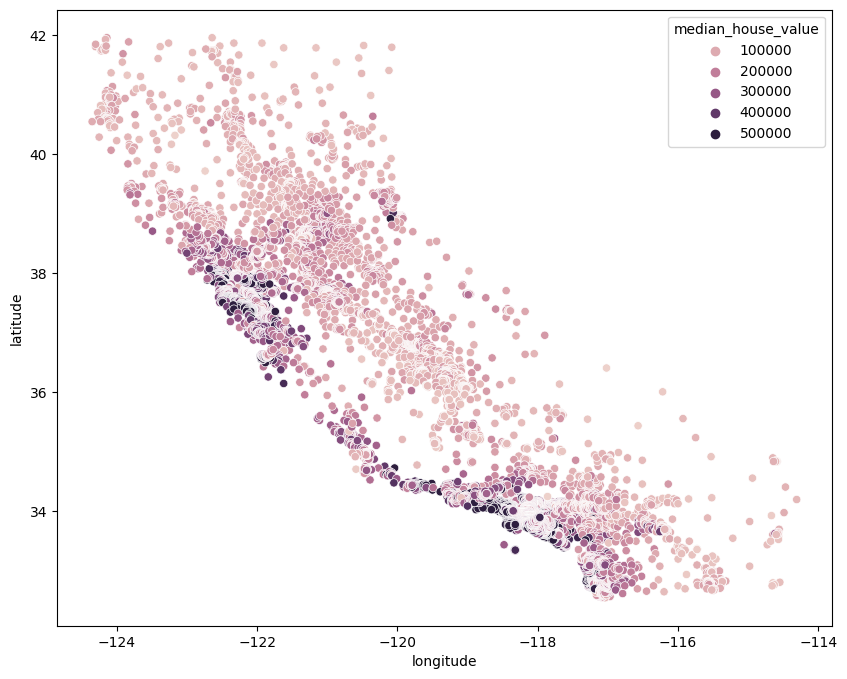

In [17]:
# Visualize the data
plt.figure(figsize = (10, 8))
sns.scatterplot(data = home_data_median, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [18]:
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(home_data_median[['latitude', 'longitude']], home_data_median[['median_house_value']], test_size=0.33, random_state=0)

In [19]:
# Normalize the data

# Print before normalization
print(f"Before normalization:\n{X_train[0:5]}\n")

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# Print after normalization
print(f"After normalization:\n{X_train_norm[0:5]}")

Before normalization:
       latitude  longitude
14069     32.76    -117.12
17482     34.44    -119.81
7362      33.97    -118.19
19526     37.65    -120.97
8365      33.97    -118.35

After normalization:
[[ 0.26937372 -0.96303572]
 [ 0.2762676  -0.96108075]
 [ 0.27623513 -0.96109009]
 [ 0.2971737  -0.95482344]
 [ 0.27589013 -0.96118918]]


In [20]:
# Fitting and Evaluating the Model

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

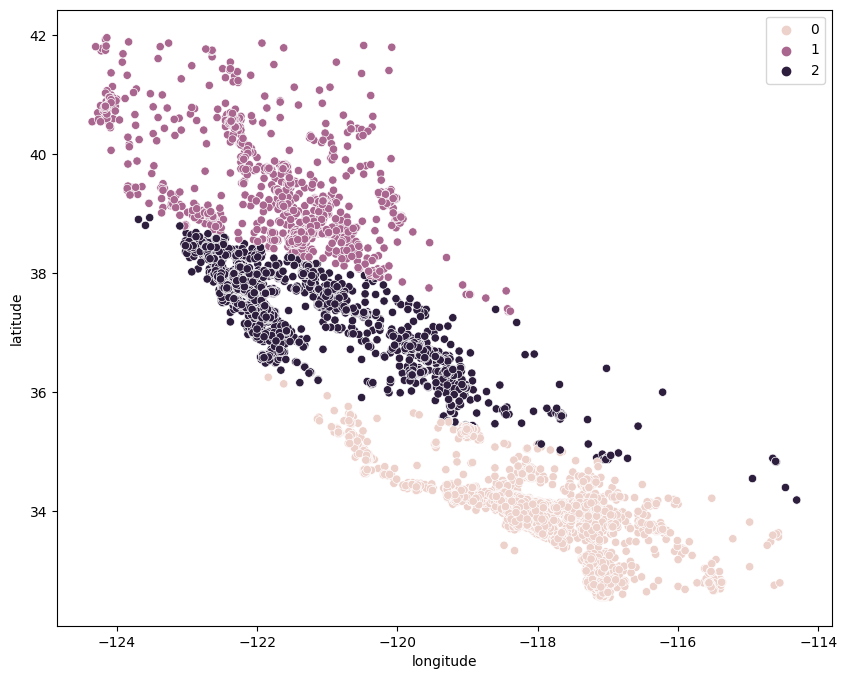

In [21]:
# Visualize the clusters
plt.figure(figsize = (10, 8))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)


In [22]:
# Evaluate the model using Silhouette Score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703546

In [29]:
# Finding the optimal number of clusters using a for loop and Silhouette Score

K = range(2, 9)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))


[0.7754128527515257, 0.7499371920703546, 0.6977084899900465, 0.6404445378227861, 0.6641273887010468, 0.6411192392524833, 0.6390867779226383]


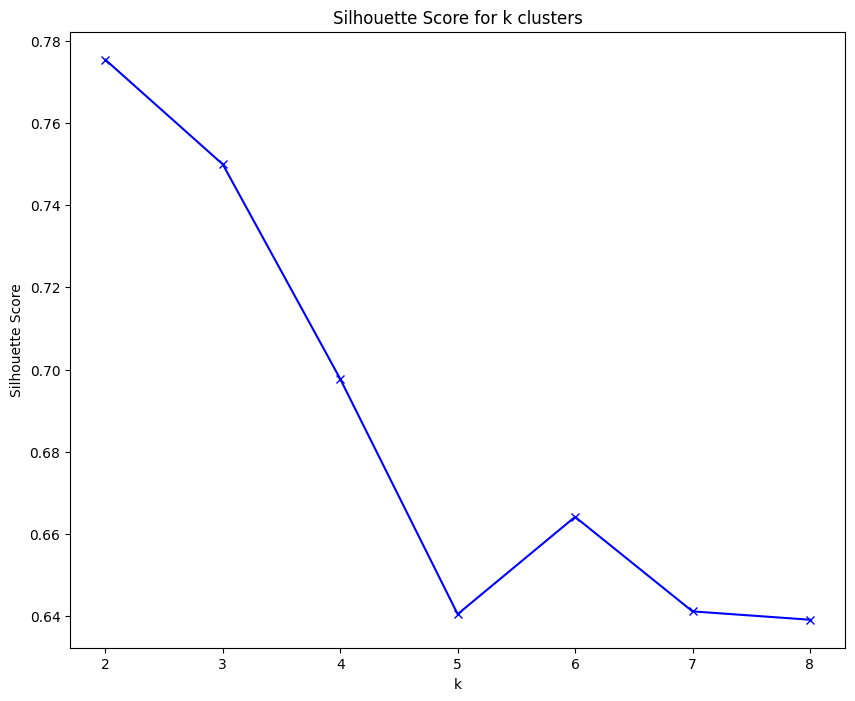

In [24]:
# Visualize the silhouette scores
plt.figure(figsize = (10, 8))
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k clusters')
plt.show()


<Axes: ylabel='median_house_value'>

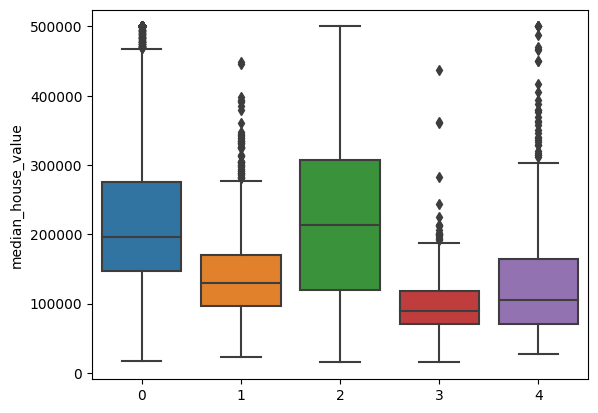

In [25]:
# We see that the optimal number of clusters seems to be 3, as the silhouette score is highest for k = 3 without overfitting, which k = 4 seems to do.

# Visualizing the clusters with respect to the median house value in a boxplot
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

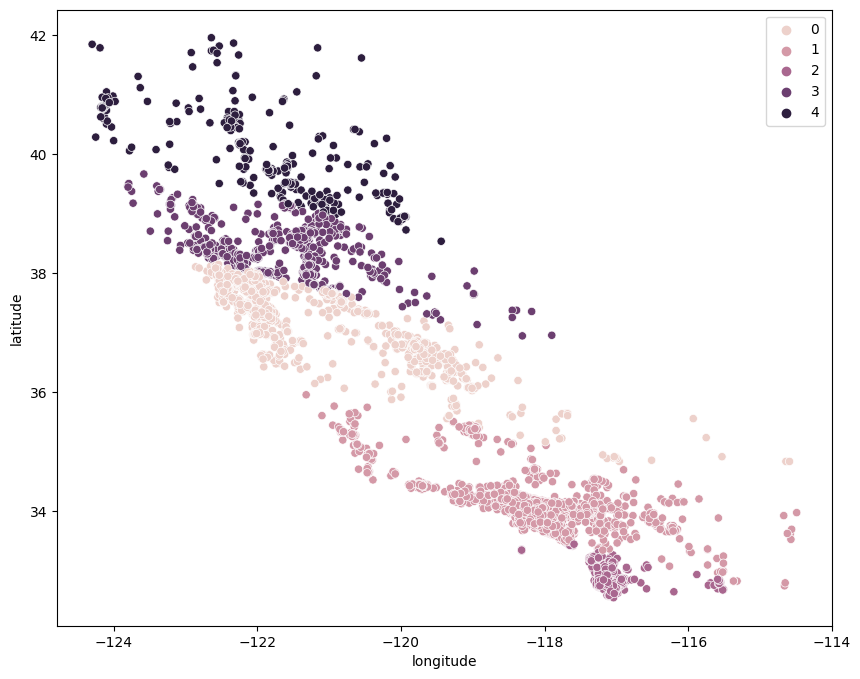

In [26]:
# Implementing the model on the test data with the new k value of 5

kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(X_test_norm)

# Visualize the clusters
plt.figure(figsize = (10, 8))
sns.scatterplot(data = X_test, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()

<Axes: ylabel='median_house_value'>

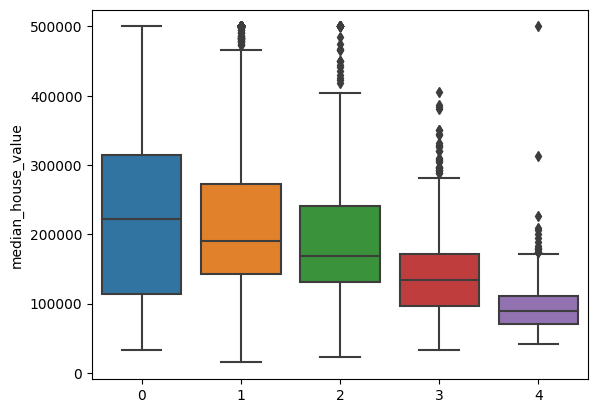

In [27]:
# Visualizing the clusters with respect to the median house value in a boxplot
sns.boxplot(x = kmeans.labels_, y = y_test['median_house_value'])